In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv(r"C:\Users\aalme\python folder\Advertising.csv",index_col=0,header=0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 4)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

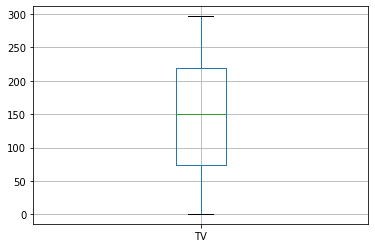

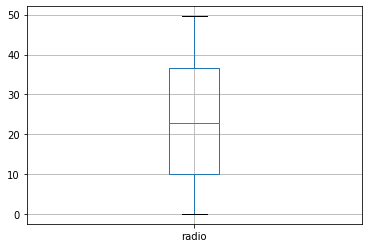

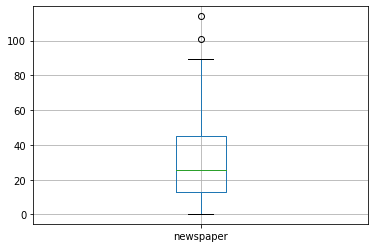

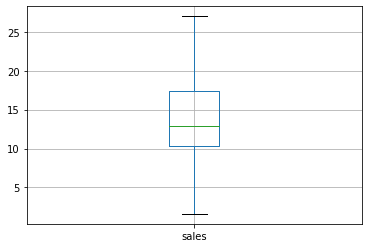

In [12]:
#assumption 1:there should be no outliers in the data
#check using boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

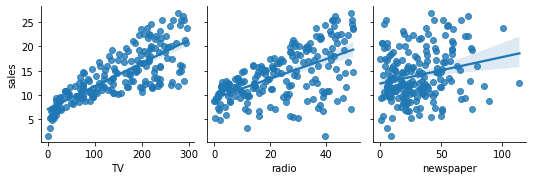

In [13]:
#Assumption 2:Assumption of linearity:every independent variable should hv a linear relationship with the dependent variable

sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind="reg")

In [14]:
#data.drop(["newspaper"],axis=1,inplace=True) #ideally we should execute it

In [15]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [16]:
# create X and Y
X=data[["TV","radio","newspaper"]]
Y=data["sales"]
#X=data.iloc[:,o:-1] alternative method 

In [17]:
print(X.shape)

(200, 3)


In [18]:
print(Y.shape)

(200,)


In [19]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='sales', ylabel='Density'>

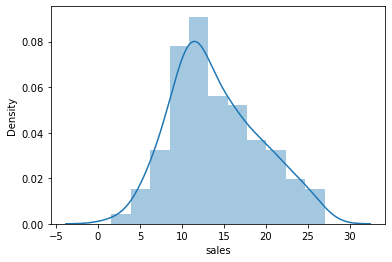

In [20]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribution

sns.distplot(Y,hist=True)

In [21]:
#if it not normally distributed , it is skewed then use log transformation 
"""# Log transformation
import numpy as np
Y_log=np.log(Y)"""


'# Log transformation\nimport numpy as np\nY_log=np.log(Y)'

In [22]:
#sns.distplot(Y_log,hist=True) #dont perform this as it is getting more skewewd

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

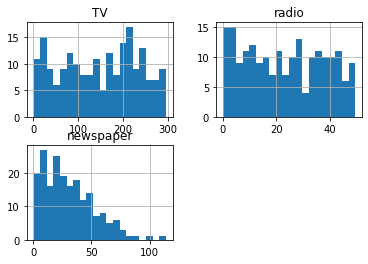

In [23]:
X.hist(bins=20)

In [24]:
#generic code to be used everywhere
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#when there is zero value in the data use log1 not log0 bcoz log0=-infinity
#even for Y

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

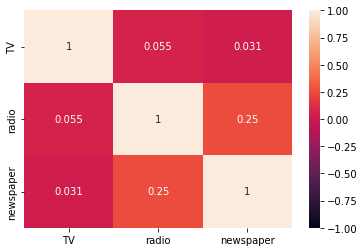

In [25]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables i.e x1 and x2..there should be a relation between x and y
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

 



In [26]:
# if there was a high correlation eg 0.89 then eliminate the  variable that is most problematic

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] #[1]is the column in (200,3)...will get 3
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [28]:
#newspaper is problematic as VIF IS SLIGHTLY more than 5

In [29]:
#X.drop("newspaper",axis=1,inplace=True) #at this point drop newspaper but just for the lecture v will not to study if v dont
#rerun VIF CODE and eliminate the problamatic variable one by one

In [30]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [32]:
# >1000-->test_size=0.3
# <1000-->test_size=0.2


In [33]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]


In [34]:
#for newspaper the beta value is negative so drop newspaper (convey this to d client)

In [35]:
# pair the feature names with the coefficient
print(list(zip(X.columns,lm.coef_)))  # zipping the values of tv,n,radio with their coefficient

[('TV', 0.04374250157742164), ('radio', 0.19303707897345299), ('newspaper', -0.04895136822248787)]


In [36]:
# doing manual calculations for small data
X1=100
X2=100
X3=np.log1p(100)
Y_pred=3.3532913858151545+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332913800665


In [37]:
# so if v invest 100K$ in tv we get 0.04 in sales and 0.19 in radio but negatively in newspaper

In [38]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [39]:
lm.score(X_train,Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9208986647500219

In [40]:
new_df=pd.DataFrame()
new_df=X_test

new_df["actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

,TV,radio,newspaper,actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035319
RMSE: 2.5929769110930607
Adj R-square: 0.8322725168816472


In [42]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [43]:
new_df["Deviation"]=new_df["actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [44]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [45]:
Y_pred=lm.predict(X_test)

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""
previous values:
R-squared: 0.8348010719035319
RMSE: 2.5929769110930607
Adj R-square: 0.8322725168816472


"""

R-squared: 0.8348010719035319
RMSE: 2.5929769110930607
Adj R-square: 0.8322725168816472


'\nprevious values:\nR-squared: 0.8348010719035319\nRMSE: 2.5929769110930607\nAdj R-square: 0.8322725168816472\n\n\n'

In [47]:
from sklearn.linear_model import Ridge
#create a model object
lm=Ridge()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [48]:
Y_pred=lm.predict(X_test)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error  
import numpy as np 

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


In [50]:
from sklearn.linear_model import Lasso
#create a model object
lm=Lasso()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [49]:
from sklearn.metrics import r2_score,mean_squared_error  #here v hv used Y_new-pred
import numpy as np 

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


In [50]:
#lasso eliminated newspaper c above n check notes

In [51]:
Y_pred=lm.predict(X_test)

In [52]:
#OLS-->OLS(Y_train, X_train)
#ols-->ols(Y~X1+X2+X3)

 



In [53]:
#fit(X_train, Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodels

In [54]:
new_df=pd.DataFrame()
new_df=X_train

new_df["sales"]=Y_train
new_df.shape

(160, 4)

In [55]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]

"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           1.10e-85
Time:                        11:27:37   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3532913858151527\n[ 0.0437425   0.19303708 -0.04895137]\n\n'

In [56]:
Y_pred_new=lm_model.predict(X_test)

In [57]:
from sklearn.metrics import r2_score,mean_squared_error  #here v hv used Y_new-pred
import numpy as np 

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


In [58]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio ', 
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           3.47e-87
Time:                        11:27:37   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [59]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error  #here v hv used Y_new-pred
import numpy as np 

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)



R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


Text(0, 0.5, 'Residuals')

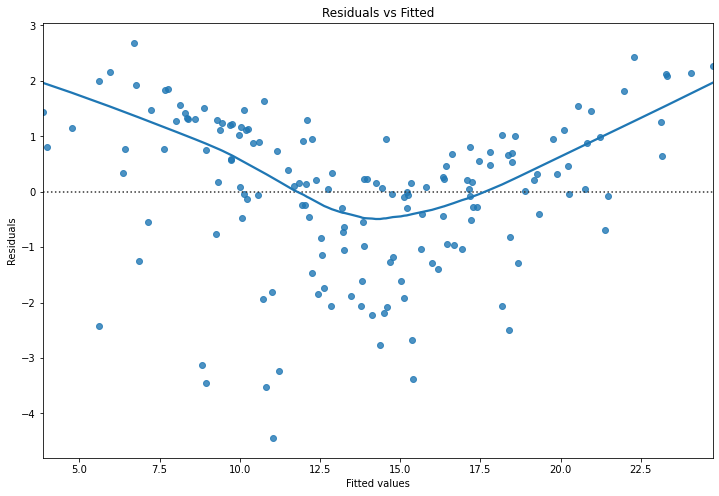

In [60]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

 

In [61]:
# looking above v shud not hv a wave like pattern ,all other random lines will do

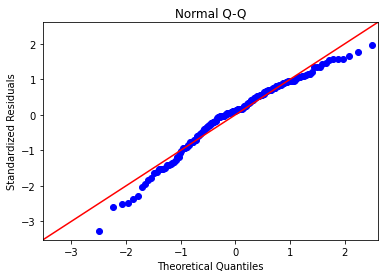

In [62]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

In [63]:
#looking above the error points should follow the red diagonal line

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

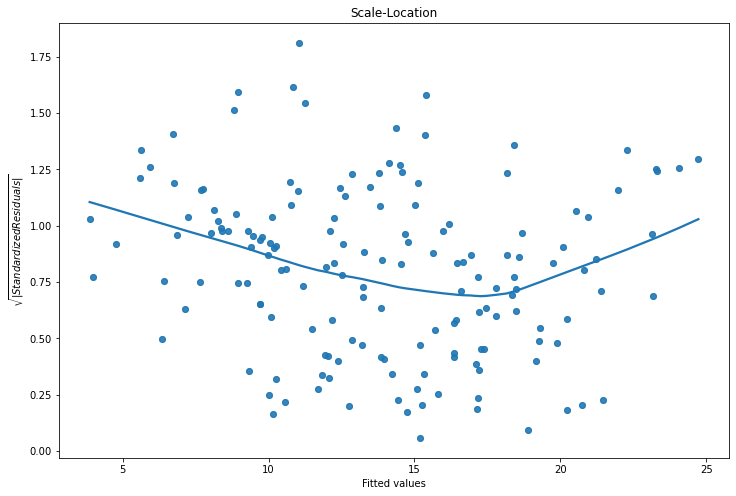

In [64]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

In [65]:
# we get to see a approx horizontal line and not a steep v-shaped curve

In [66]:
#create X and Y
X=data[["TV","radio","newspaper"]]
Y=data["sales"]

In [67]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(X)
#X=scaler.transform(X)( # the scaler object should b fitted only on the training data & d same scaler object should be used to transform both the train and d test data)
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [68]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [69]:
from sklearn.linear_model import SGDRegressor
lm=SGDRegressor(learning_rate="constant",
               #want to use a constant learning rate
               eta0=0.01, # alpha
                shuffle=True,
#while going ahead with the next epoch shuffle the obs
                random_state=10,# set seed
                max_iter=1000,#max no. of epochs
                early_stopping=True,
                #stop if zero convergence is reached first
                n_iter_no_change=5)

  #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]
"""

"""
scaled values: eta0=0.01 
[14.12127235]
[ 3.8052956   2.80435173 -0.02716654]
"""


[14.12339593]
[ 3.81092365  2.80450708 -0.04411337]


'\nscaled values: eta0=0.01 \n[14.12127235]\n[ 3.8052956   2.80435173 -0.02716654]\n'

In [70]:
Y_pred_new=lm.predict(X_test)

In [71]:
from sklearn.metrics import r2_score,mean_squared_error  
import numpy as np 

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""best values--> lasso

0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

"""


R-squared: 0.8385034893701074
RMSE: 2.5637555216282193
Adj R-square: 0.8360316040033233


'best values--> lasso\n\n0.8348082644975935\nRMSE: 2.5929204626839977\nAdj R-square: 0.8322798195664342\n\n'

In [72]:
#Y_pred_new=lm.predict(X_test)

In [73]:
  # using eta0=0.001 
  """from sklearn.linear_model import SGDRegressor
lm=SGDRegressor(learning_rate="constant",
               #want to use a constant learning rate
               eta0=0.001, # alpha
                shuffle=True,
#while going ahead with the next epoch shuffle the obs
                random_state=10,# set seed
                max_iter=1000,#max no. of epochs
                early_stopping=True,
                #stop if zero convergence is reached first
                n_iter_no_change=5)

  #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)"""

'#from sklearn.linear_model import SGDRegressor\nlm=SGDRegressor(learning_rate="constant",\n               #want to use a constant learning rate\n               eta0=0.001, # alpha\n                shuffle=True,\n#while going ahead with the next epoch shuffle the obs\n                random_state=10,# set seed\n                max_iter=1000,#max no. of epochs\n                early_stopping=True,\n                #stop if zero convergence is reached first\n                n_iter_no_change=5)\n\n  #no of obs to wait for before concluding upon early stopping\nlm.fit(X_train,Y_train)\n\n\n# print intercept and coefficients\nprint (lm.intercept_)\nprint (lm.coef_)'

In [74]:
#Y_pred_new=lm.predict(X_test)

In [75]:
"""#from sklearn.metrics import r2_score,mean_squared_error  
import numpy as np 

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)"""


'#from sklearn.metrics import r2_score,mean_squared_error  \nimport numpy as np \n\nr2=r2_score(Y_test,Y_pred_new)\nprint("R-squared:",r2)\n\nrmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))\nprint("RMSE:",rmse)\n\nadjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)\nprint("Adj R-square:",adjusted_r_squared)'

In [76]:
lm.n_iter_

7

In [77]:
lm.t_

1121.0